In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import random
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data folder
data_dir = '/content/drive/MyDrive/TB_Project/Raw'
classes = ['TB', 'Normal']

In [ ]:
for cls in ['TB', 'Normal']:
    path = os.path.join(data_dir, cls)
    print(f"{cls}: Exists? {os.path.exists(path)} | Images: {len(os.listdir(path)) if os.path.exists(path) else 'N/A'}")


TB: Exists? True | Images: 2494
Normal: Exists? True | Images: 514


Class Distribution: {'TB': 2494, 'Normal': 514}


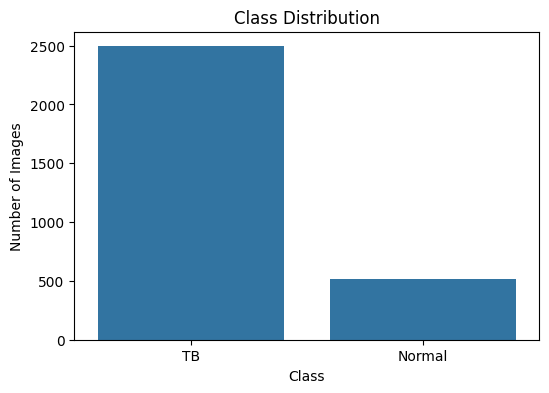

In [ ]:
# 1. Count images in each class
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
print("Class Distribution:", class_counts)

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.savefig('/content/drive/MyDrive/TB_Project/Visuals/class_distribution.png')
plt.show()

In [ ]:
# 2. Show sample images from each class
def show_samples(class_name, n=4):
    folder = os.path.join(data_dir, class_name)
    images = random.sample(os.listdir(folder), n)

    plt.figure(figsize=(12,4))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.suptitle(f"Sample Images: {class_name}")
    plt.savefig(f'/content/drive/MyDrive/TB_Project/Visuals/samples_{class_name}.png')
    plt.show()

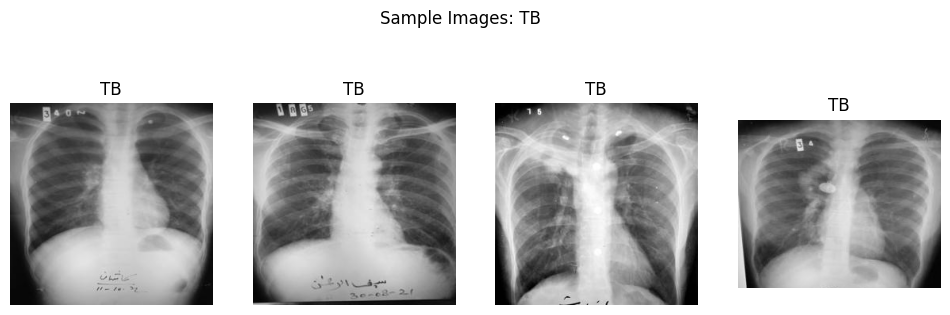

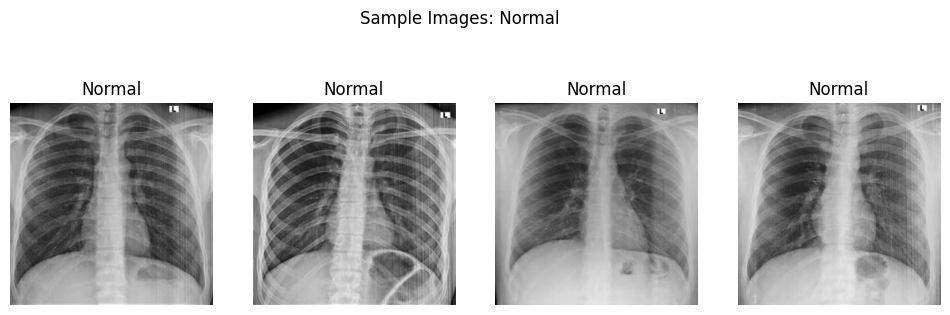

In [ ]:
# Show samples
show_samples("TB")
show_samples("Normal")

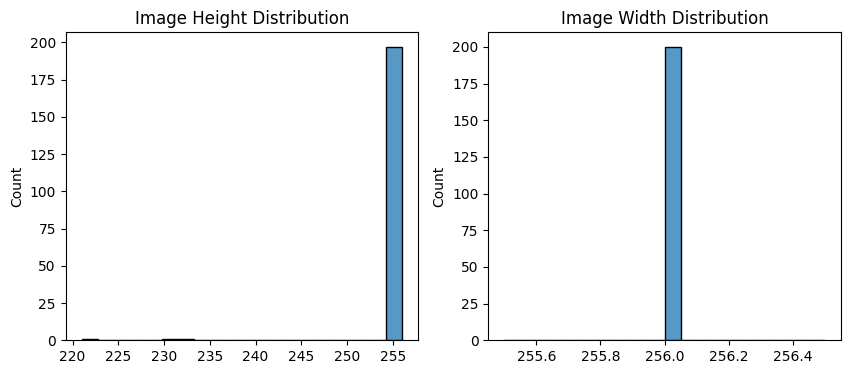

In [ ]:
img_shapes = []

for cls in classes:
    folder = os.path.join(data_dir, cls)
    for img_name in random.sample(os.listdir(folder), 100):  # only 100 for speed
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img_shapes.append(img.shape[:2])  # (height, width)

# Plot
heights = [h for h, w in img_shapes]
widths = [w for h, w in img_shapes]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(heights, bins=20)
plt.title("Image Height Distribution")

plt.subplot(1,2,2)
sns.histplot(widths, bins=20)
plt.title("Image Width Distribution")
plt.savefig(f'/content/drive/MyDrive/TB_Project/Visuals/height_and_width_distribution')
plt.show()


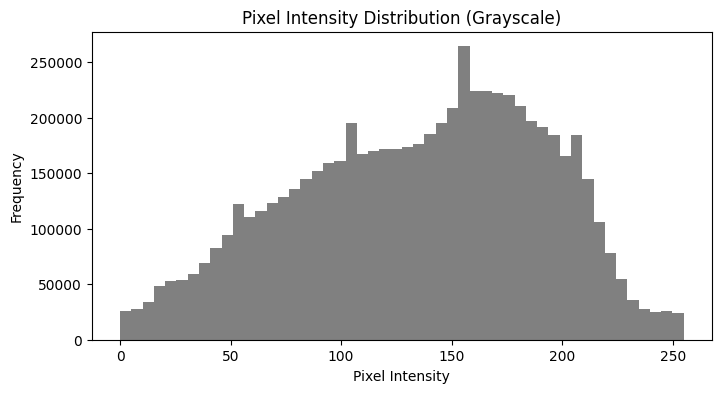

In [ ]:
all_pixels = []

for cls in classes:
    folder = os.path.join(data_dir, cls)
    for img_name in random.sample(os.listdir(folder), 50):  # take 50 images per class
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            all_pixels.extend(img.flatten())

# Plot histogram
plt.figure(figsize=(8,4))
plt.hist(all_pixels, bins=50, color='gray')
plt.title("Pixel Intensity Distribution (Grayscale)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.savefig(f'/content/drive/MyDrive/TB_Project/Visuals/pixel_density')
plt.show()


In [ ]:
import cv2
from tqdm import tqdm

corrupted_images = []

for cls in classes:
    folder = os.path.join(data_dir, cls)
    for img_name in tqdm(os.listdir(folder), desc=f"Checking {cls}"):
        img_path = os.path.join(folder, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                corrupted_images.append(img_path)
        except Exception as e:
            corrupted_images.append(img_path)

# Results
print(f"🔍 Total Corrupted Images Found: {len(corrupted_images)}")

if corrupted_images:
    print("⚠️ Corrupted files:")
    for f in corrupted_images:
        print(f)
else:
    print("✅ All images are clean and readable!")


Checking Normal: 100%|██████████| 514/514 [00:02<00:00, 190.40it/s]

🔍 Total Corrupted Images Found: 0
✅ All images are clean and readable!
